In [2]:
# Usual imports
import strawberryfields as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

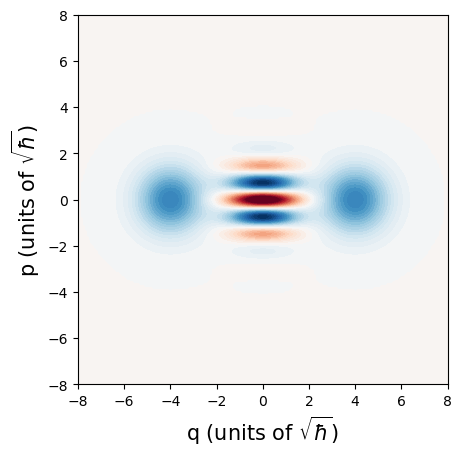

In [4]:
# Simulation and cat state parameters
nmodes = 1
cutoff = 30
q = 4.0
p = 0.0
hbar = 2
alpha = (q + 1j * p) / np.sqrt(2 * hbar)
k = 1
theta = np.arccos(np.sqrt(0.75)) # arccos of the transmittivity of the beamsplitter

# SF program
prog_cat_fock = sf.Program(nmodes)
with prog_cat_fock.context as q:
    sf.ops.Catstate(a=np.absolute(alpha), phi=np.angle(alpha), p=k) | q
    

eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff, "hbar": hbar})
state = eng.run(prog_cat_fock).state

# We now plot it
xvec = np.linspace(-8, 8, 201)
W = state.wigner(mode=0, xvec=xvec, pvec=xvec)
Wp = np.round(W.real, 4)
scale = np.max(Wp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(xvec, xvec, Wp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.show()

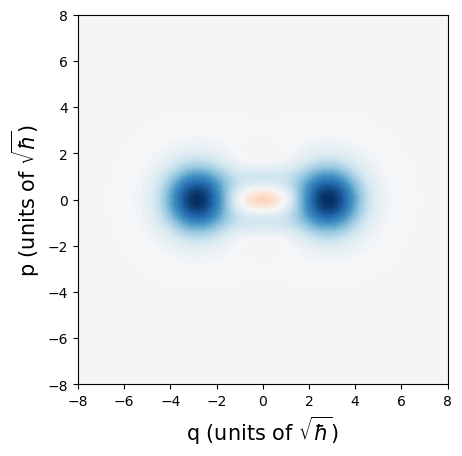

In [3]:
# Simulation and cat state parameters
nmodes = 2
cutoff = 30
q = 4.0
p = 0.0
hbar = 2
alpha = (q + 1j * p) / np.sqrt(2 * hbar)
k = 1
theta = np.arccos(np.sqrt(0.5)) # arccos of the transmittivity of the beamsplitter

# SF program
prog_cat_fock = sf.Program(nmodes)
with prog_cat_fock.context as q:
    sf.ops.Catstate(a = np.absolute(alpha), phi = np.angle(alpha), p = k) | q[0]
    sf.ops.Vacuum() | q[1]
    sf.ops.BSgate(theta,0) | (q[0], q[1])
    sf.ops.LossChannel(0.50) | q[1]
    sf.ops.MeasureFock(select = 0) | q[1]
    

eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff, "hbar": hbar})
state = eng.run(prog_cat_fock).state

# We now plot it
xvec = np.linspace(-8, 8, 201)
W = state.wigner(mode = 0, xvec = xvec, pvec = xvec)
Wp = np.round(W.real, 4)
scale = np.max(Wp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(xvec, xvec, Wp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.show()

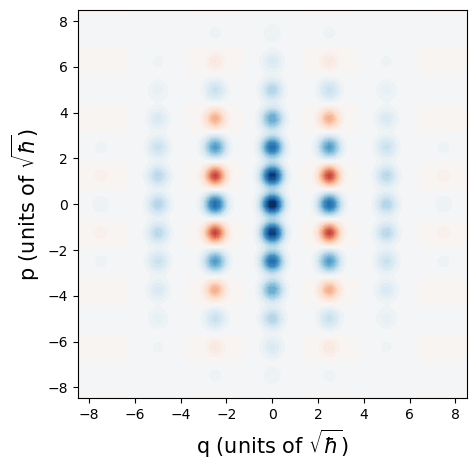

In [5]:
# Finite energy GKP
nmodes = 1
epsilon = 0.10
hbar = 2

# SF program
prog = sf.Program(nmodes)
with prog.context as q:
    sf.ops.GKP(epsilon=epsilon) | q
eng = sf.Engine("bosonic")
gkp = eng.run(prog).state

# Quadrature bins for plotting
scale = np.sqrt(hbar)
quad_axis= np.linspace(-6, 6, 100) * scale

Wgkp = gkp.wigner(mode=0, xvec=quad_axis, pvec=quad_axis)
scale = np.max(Wgkp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Wgkp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.tight_layout()
plt.show()

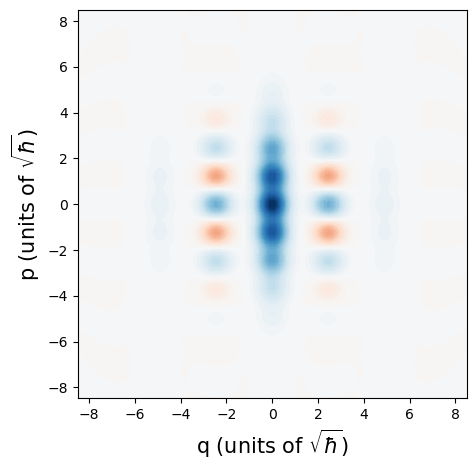

In [6]:
# ideal 0 photon subtraction
nmodes = 2
epsilon = 0.10
hbar = 2
theta = np.arccos(np.sqrt(0.80)) # arccos of the transmittivity of the beamsplitter
# Heralding parameters
n = 0 
efficiency = 1

# SF program
prog = sf.Program(nmodes)
with prog.context as q:
    sf.ops.GKP(epsilon=epsilon) | q[0]
    sf.ops.Vacuum() | q[1]
    sf.ops.BSgate(theta, 0) | (q[0], q[1])
    sf.ops.LossChannel(efficiency)
    sf.ops.MeasureFock(select = n) | q[1]

    
eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff, "hbar": hbar} )
gkp = eng.run(prog).state

# Quadrature bins for plotting
scale = np.sqrt(hbar)
quad_axis= np.linspace(-6, 6, 100) * scale

Wgkp = gkp.wigner(mode=0, xvec=quad_axis, pvec=quad_axis)
scale = np.max(Wgkp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Wgkp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.tight_layout()
plt.show()

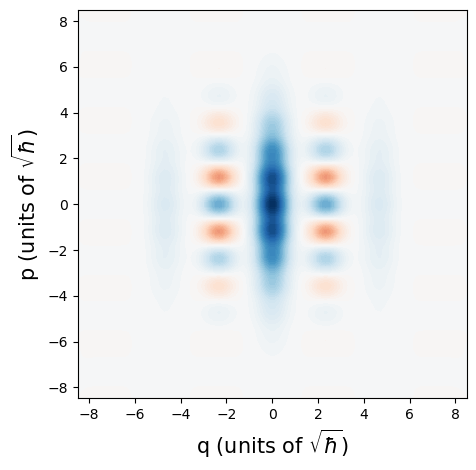

In [9]:
# inefficient 0 photon subtraction
nmodes = 2
epsilon = 0.10
hbar = 2
theta = np.arccos(np.sqrt(0.80)) # arccos of the transmittivity of the beamsplitter
# heralding parameters
n = 0
efficiency = 0.5

# SF program
prog = sf.Program(nmodes)
with prog.context as q:
    sf.ops.GKP(epsilon=epsilon) | q[0]
    sf.ops.Vacuum() | q[1]
    sf.ops.BSgate(theta, 0) | (q[0], q[1])
    sf.ops.LossChannel(efficiency) | q[1]
    sf.ops.MeasureFock(select = n) | q[1]

    
eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff+30, "hbar": hbar} )
gkp = eng.run(prog).state

# Quadrature bins for plotting
scale = np.sqrt(hbar)
quad_axis= np.linspace(-6, 6, 100) * scale

Wgkp = gkp.wigner(mode=0, xvec=quad_axis, pvec=quad_axis)
scale = np.max(Wgkp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Wgkp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.tight_layout()
plt.show()

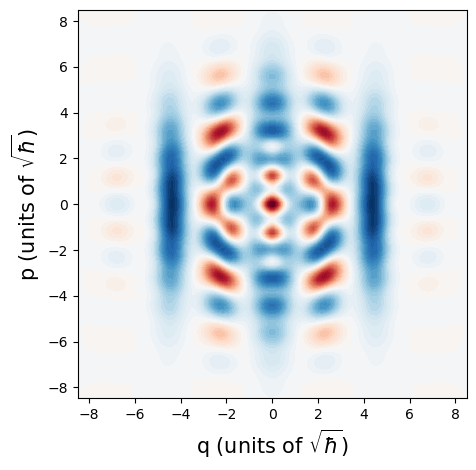

In [10]:
# inefficient 1 photon subtraction
nmodes = 2
epsilon = 0.10
hbar = 2
theta = np.arccos(np.sqrt(0.80)) # arccos of the transmittivity of the beamsplitter
# heralding parameters
n = 1
efficiency = 0.5

# SF program
prog = sf.Program(nmodes)
with prog.context as q:
    sf.ops.GKP(epsilon=epsilon) | q[0]
    sf.ops.Vacuum() | q[1]
    sf.ops.BSgate(theta, 0) | (q[0], q[1])
    sf.ops.LossChannel(efficiency) | q[1]
    sf.ops.MeasureFock(select = n) | q[1]

    
eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff+30, "hbar": hbar} )
gkp = eng.run(prog).state

# Quadrature bins for plotting
scale = np.sqrt(hbar)
quad_axis= np.linspace(-6, 6, 100) * scale

Wgkp = gkp.wigner(mode=0, xvec=quad_axis, pvec=quad_axis)
scale = np.max(Wgkp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Wgkp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.tight_layout()
plt.show()

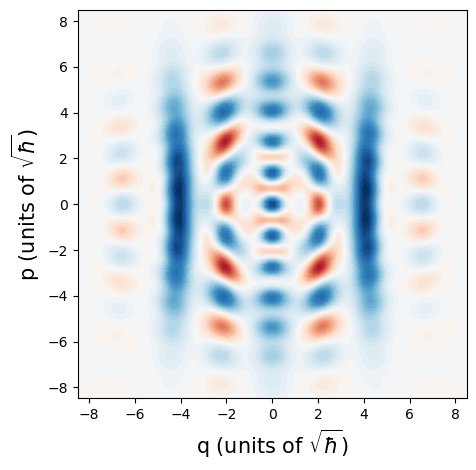

In [7]:
# inefficient 2 photon subtraction
nmodes = 2
epsilon = 0.10
hbar = 2
theta = np.arccos(np.sqrt(0.80)) # arccos of the transmittivity of the beamsplitter
# heralding parameters
n = 2
efficiency = 0.5

# SF program
prog = sf.Program(nmodes)
with prog.context as q:
    sf.ops.GKP(epsilon=epsilon) | q[0]
    sf.ops.Vacuum() | q[1]
    sf.ops.BSgate(theta, 0) | (q[0], q[1])
    sf.ops.LossChannel(efficiency) | q[1]
    sf.ops.MeasureFock(select = n) | q[1]

    
eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff+30, "hbar": hbar} )
gkp = eng.run(prog).state

# Quadrature bins for plotting
scale = np.sqrt(hbar)
quad_axis= np.linspace(-6, 6, 100) * scale

Wgkp = gkp.wigner(mode=0, xvec=quad_axis, pvec=quad_axis)
scale = np.max(Wgkp.real)
nrm = mpl.colors.Normalize(-scale, scale)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Wgkp, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel(r"q (units of $\sqrt{\hbar}$)", fontsize=15)
plt.ylabel(r"p (units of $\sqrt{\hbar}$)", fontsize=15)
plt.tight_layout()
plt.show()